<a href="https://colab.research.google.com/github/RENISA-GRACELIN/Online_Internship_Projects/blob/main/Online_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/100
----------
Training Loss: 1.6505, Accuracy: 20.00%
Testing Accuracy: 20.00%
Epoch 2/100
----------
Training Loss: 1.3523, Accuracy: 50.86%
Testing Accuracy: 12.00%
Epoch 3/100
----------
Training Loss: 1.1149, Accuracy: 64.00%
Testing Accuracy: 24.00%
Epoch 4/100
----------
Training Loss: 0.9175, Accuracy: 73.71%
Testing Accuracy: 28.00%
Epoch 5/100
----------
Training Loss: 0.8286, Accuracy: 78.29%
Testing Accuracy: 40.00%
Epoch 6/100
----------
Training Loss: 0.7713, Accuracy: 72.57%
Testing Accuracy: 40.00%
Epoch 7/100
----------
Training Loss: 0.6229, Accuracy: 84.00%
Testing Accuracy: 52.00%
Epoch 8/100
----------
Training Loss: 0.5926, Accuracy: 85.14%
Testing Accuracy: 36.00%
Epoch 9/100
----------
Training Loss: 0.4546, Accuracy: 86.86%
Testing Accuracy: 60.00%
Epoch 10/100
----------
Training Loss: 0.4885, Accuracy: 82.86%
Testing Accuracy: 40.00%
Epoch 11/100
----------
Training Loss: 0.4372, Accuracy: 90.86%
Testing Accuracy: 40.00%
Epoch 12/100
----------
Traini

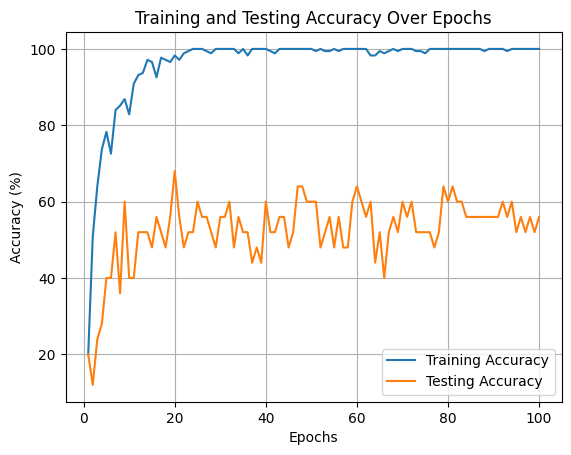

In [15]:
import os
import time
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, models, datasets
import matplotlib.pyplot as plt

# Define the path to your dataset
train_data_dir = '/content/drive/MyDrive/DR_50/Train'
test_data_dir = '/content/drive/MyDrive/DR_50/Test'

# Define transforms for data augmentation and normalization
tform = transforms.Compose([
    transforms.RandomRotation(20),
    transforms.Resize((224, 224)),  # Resize to match input size of ResNet18
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # ImageNet normalization
])

# Load the datasets
train_dataset = datasets.ImageFolder(root=train_data_dir, transform=tform)
test_dataset = datasets.ImageFolder(root=test_data_dir, transform=tform)

# Define the batch size
batch_size = 32

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Use a pre-trained ResNet18
model = models.resnet18(pretrained=True)

# Convert model to grayscale
model.conv1 = torch.nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=1, bias=False)

# Update the fully connected layer based on the number of classes in the dataset
model.fc = torch.nn.Linear(model.fc.in_features, len(train_dataset.classes))

model.to(device)

# Specify the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Lists to store training and testing accuracy for plotting
Train_accuracy_list = []
Test_accuracy_list = []

# Define the training function
def train_one_epoch(model, optimizer, data_loader, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(data_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    accuracy = 100 * correct / total
    Train_accuracy_list.append(accuracy)  # Store accuracy for plotting
    print('Training Loss: {:.4f}, Accuracy: {:.2f}%'.format(running_loss / len(data_loader), accuracy))

# Define the testing function
def test_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    accuracy = 100 * correct / total
    Test_accuracy_list.append(accuracy)  # Store accuracy for plotting
    print('Testing Accuracy: {:.2f}%'.format(accuracy))

# Train and test the model
num_epochs = 100
for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch+1, num_epochs))
    print('-' * 10)
    train_one_epoch(model, optimizer, train_loader, device)
    test_model(model, test_loader)

print('Finished Training')

# Plotting the accuracy graph
epochs = range(1, num_epochs+1)
plt.plot(epochs, Train_accuracy_list, label='Training Accuracy')
plt.plot(epochs, Test_accuracy_list, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()
